<a href="https://colab.research.google.com/github/sethkipsangmutuba/Summer-School-Mathematics-of-Artificial-Intellingence/blob/Deep-Learning/a3%20Sequential_Decision_Making_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

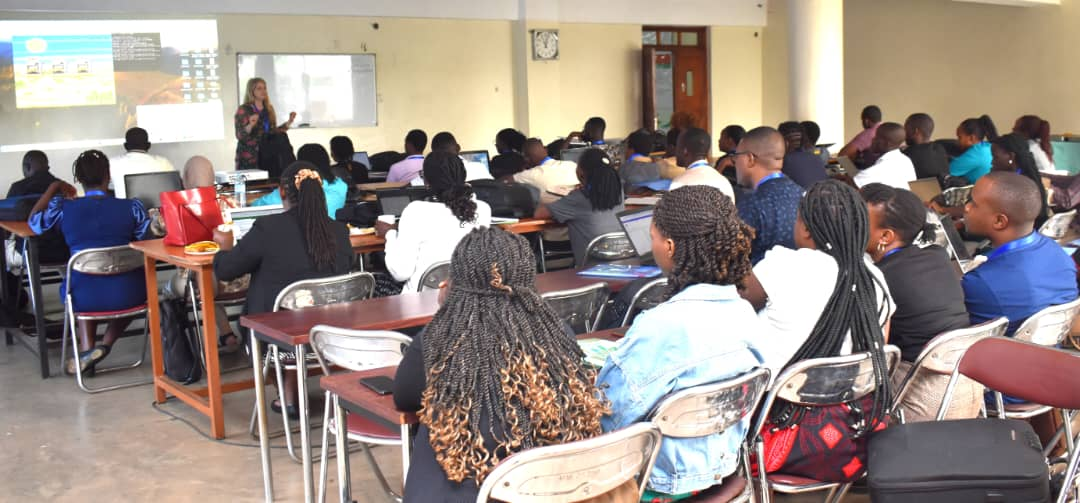

# Question 1 Solution

# Mathematical Derivation

## Definitions

### Regret  $( R(\nu, T) )$: The regret is defined as the difference between the total reward obtained by the optimal policy and the total reward obtained by the learner's policy.

$$
R(\nu, T) = T \mu^*(\nu) - \mathbb{E} \left[ \sum_{t=1}^T R_t \right]
$$

where $(\mu^*(\nu))$ is the expected reward of the optimal action.

### Action Gap $(\Delta_a(\nu))$: The action gap is the difference between the expected reward of the optimal action and the expected reward of action $( a)$:

$$
\Delta_a(\nu) = \mu^* - \mu_a(\nu)
$$

###Number of Times Action $( a )$ Was Chosen by the Learner $( N_a(t))$:

$$
N_a(t) = \sum_{s=1}^t I\{A_s = a\}
$$

where $( I\{A_s = a\})$ is an indicator function that is 1 if action $( a )$ was chosen at time $( s )$ and 0 otherwise.

##Derivation

###Total Reward by Learner:

The total reward obtained by the learner up to time $( T)$ can be written as:

$$
\sum_{t=1}^T R_t = \sum_{a \in A} \sum_{t=1}^T R_t I\{A_t = a\}
$$

where $( R_t)$ is the reward obtained at time $( t)$ and $I\{A_t = a\}$ indicates whether action $( a )$ was chosen at time $( t )$.

##Expected Regret:

The expected regret can be written as:

$$
R(\nu, T) = T \mu^* - \mathbb{E} \left[ \sum_{t=1}^T R_t \right]
$$

Substituting the expression for total reward:

$$
R(\nu, T) = T \mu^* - \mathbb{E} \left[ \sum_{a \in A} \sum_{t=1}^T R_t I\{A_t = a\} \right]
$$

Since $( R_t )$ is the reward of action $( A_t )$, we can write:

$$
R(\nu, T) = T \mu^* - \sum_{a \in A} \mathbb{E} \left[ \sum_{t=1}^T R_t I\{A_t = a\} \right]
$$

$$
= T \mu^* - \sum_{a \in A} \mu_a(\nu) \mathbb{E} \left[ N_a(T) \right]
$$

$$
= \sum_{a \in A} (\mu^* - \mu_a(\nu)) \mathbb{E} \left[ N_a(T) \right]
$$

$$
= \sum_{a \in A} \Delta_a(\nu) \mathbb{E} \left[ N_a(T) \right]
$$

Thus, the regret can be expressed as:

$$
R(\nu, T) = \sum_{a \in A} \Delta_a(\nu) \mathbb{E} \left[ N_a(T) \right]
$$


Total number of time steps (T): 1000
Optimal action reward (mu*): 1.0
Action rewards (mu_a): {'A': 0.5, 'B': 0.2}
Final counts for actions A and B: {'A': 712, 'B': 288}
Final cumulative regret: 586.4


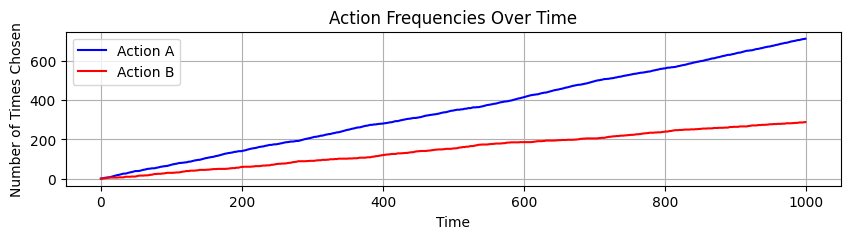

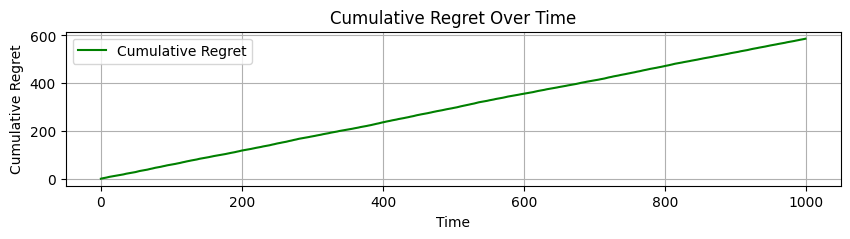

<ipython-input-4-162a309bbcf4>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=action_labels, y=action_gaps, palette='viridis')


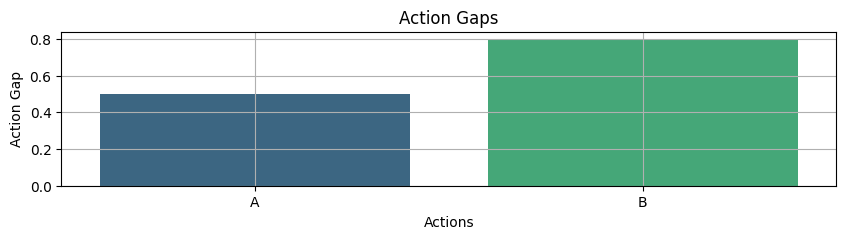

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
T = 1000  # Total time steps
actions = ['A', 'B']  # Two possible actions
mu_star = 1.0  # Optimal action's reward
mu_a = {'A': 0.5, 'B': 0.2}  # Rewards for each action

# Initialize counts
N_a = {a: 0 for a in actions}
cumulative_regret = []

# Simulate actions chosen over time
np.random.seed(42)
chosen_actions = np.random.choice(actions, size=T, p=[0.7, 0.3])  # Action probabilities

# Track regret over time
cumulative_regret_value = 0

# Data for plotting
regret_data = []
action_data = {'A': [], 'B': []}

for t in range(T):
    action = chosen_actions[t]
    N_a[action] += 1

    # Update regret calculation
    action_gap = {a: mu_star - mu_a[a] for a in actions}
    current_regret = sum(action_gap[a] * N_a[a] for a in actions)
    cumulative_regret_value = current_regret
    regret_data.append(cumulative_regret_value)

    # Track action choices
    action_data['A'].append(N_a['A'])
    action_data['B'].append(N_a['B'])

# Print Results
print("Total number of time steps (T):", T)
print("Optimal action reward (mu*):", mu_star)
print("Action rewards (mu_a):", mu_a)
print("Final counts for actions A and B:", N_a)
print("Final cumulative regret:", cumulative_regret_value)

# Visualization

# 1. Plot action frequencies over time
plt.figure(figsize=(10, 2))
plt.plot(action_data['A'], label='Action A', color='blue')
plt.plot(action_data['B'], label='Action B', color='red')
plt.xlabel('Time')
plt.ylabel('Number of Times Chosen')
plt.title('Action Frequencies Over Time')
plt.legend()
plt.grid(True)
plt.show()

# 2. Plot cumulative regret over time
plt.figure(figsize=(10, 2))
plt.plot(regret_data, label='Cumulative Regret', color='green')
plt.xlabel('Time')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret Over Time')
plt.legend()
plt.grid(True)
plt.show()

# 3. Regret vs. Action Gaps
plt.figure(figsize=(10, 2))
action_gaps = [mu_star - mu_a[a] for a in actions]
action_labels = list(mu_a.keys())
sns.barplot(x=action_labels, y=action_gaps, palette='viridis')
plt.xlabel('Actions')
plt.ylabel('Action Gap')
plt.title('Action Gaps')
plt.grid(True)
plt.show()


In this simulation, we conducted 1000 decision-making steps. The optimal action, which would yield the highest reward, has a reward value of 1.0. The rewards for the two actions available were 0.5 for Action A and 0.2 for Action B. Over the course of the simulation, Action A was chosen 712 times, while Action B was selected 288 times. As a result of not always choosing the optimal action, the total accumulated regret at the end of the simulation was 586.4. This regret quantifies the loss incurred from not consistently making the best choice.

# Question 2

#Exercise 2: Multi-Armed Bandit Problem
###Problem Setup:

We have $K = 6$ arms in our multi-armed bandit problem. Each arm $a$ provides a reward of 1 with probability $\mu_a$ and 0 otherwise. The true mean rewards for the arms are given by:
\begin{align*}
\mu_1 &= 0.3 \\
\mu_2 &= 0.5 \\
\mu_3 &= 0.4 \\
\mu_4 &= 0.45 \\
\mu_5 &= 0.3 \\
\mu_6 &= 0.35$
\end{align*}

###1. Generate Rewards:

For each arm $a$, simulate $T = 1000$ pulls. Each reward $R_{t,a}$ for arm $a$ at time $t$ is drawn from a Bernoulli distribution with parameter $\mu_a$:
$[
R_{t,a} \sim \text{Bernoulli}(\mu_a)
]$

We store these rewards in a matrix $R$ where $R_{t,a}$ represents the reward from arm $a$ at time $t$.

###2. Compute Empirical Means:

Calculate the empirical mean reward for each arm $a$ after different numbers of pulls:

- After 10 rounds:
$[
\hat{\mu}_{a,10} = \frac{1}{10} \sum_{t=1}^{10} R_{t,a}
]$

- After 100 rounds:
$[
\hat{\mu}_{a,100} = \frac{1}{100} \sum_{t=1}^{100} R_{t,a}
]$

- After 1000 rounds:
$[
\hat{\mu}_{a,1000} = \frac{1}{1000} \sum_{t=1}^{1000} R_{t,a}
]$

###3. Compute Deviations:

Calculate the deviation of the empirical means from the true means for each arm $a$ and each sample size:

- Deviation after 10 rounds:
$[
\text{Deviation}_{a,10} = \hat{\mu}_{a,10} - \mu_a
]$

- Deviation after 100 rounds:
$[
\text{Deviation}_{a,100} = \hat{\mu}_{a,100} - \mu_a
]$

- Deviation after 1000 rounds:
$[
\text{Deviation}_{a,1000} = \hat{\mu}_{a,1000} - \mu_a
]$

###4. Visualization:


Empirical Means after 10, 100, and 1000 Rounds:
     Arm  Mean_10_Rounds  Mean_100_Rounds  Mean_1000_Rounds
0  Arm_1             0.4             0.29             0.291
1  Arm_2             0.6             0.51             0.502
2  Arm_3             0.1             0.33             0.393
3  Arm_4             0.1             0.46             0.464
4  Arm_5             0.6             0.36             0.311
5  Arm_6             0.3             0.49             0.391

Deviations from True Means after 10, 100, and 1000 Rounds:
     Arm  Deviation_10_Rounds  Deviation_100_Rounds  Deviation_1000_Rounds
0  Arm_1                 0.10                 -0.01                 -0.009
1  Arm_2                 0.10                  0.01                  0.002
2  Arm_3                -0.30                 -0.07                 -0.007
3  Arm_4                -0.35                  0.01                  0.014
4  Arm_5                 0.30                  0.06                  0.011
5  Arm_6              

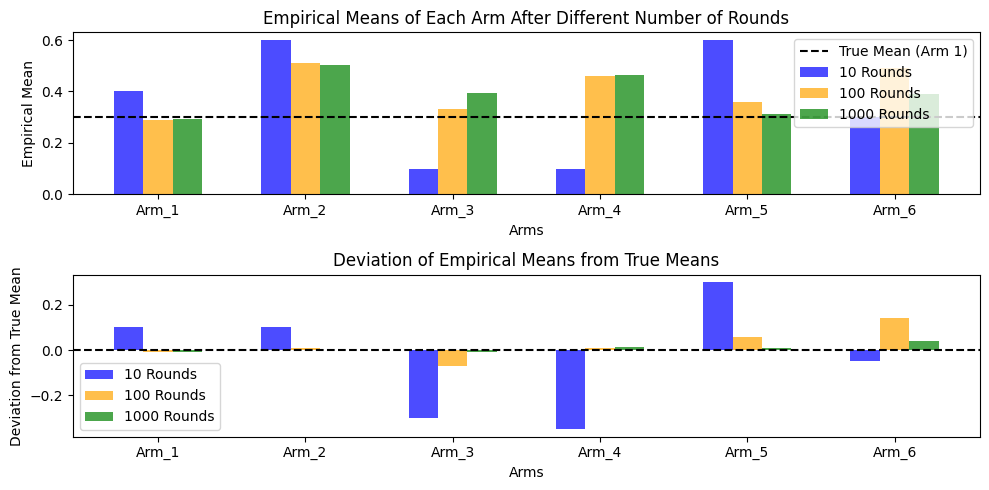

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
K = 6  # Number of arms
T = 1000  # Number of rounds

# True means for each arm
true_means = np.array([0.3, 0.5, 0.4, 0.45, 0.3, 0.35])

# Initialize the matrix to store rewards
rewards_matrix = np.zeros((T, K))

# Draw samples from Bernoulli arms
for k in range(K):
    rewards_matrix[:, k] = np.random.binomial(1, true_means[k], T)

# Function to compute empirical mean
def empirical_mean(rewards, rounds):
    return np.mean(rewards[:rounds], axis=0)

# Compute empirical means
means_after_10 = empirical_mean(rewards_matrix, 10)
means_after_100 = empirical_mean(rewards_matrix, 100)
means_after_1000 = empirical_mean(rewards_matrix, 1000)

# Create a DataFrame to display the results
empirical_means_df = pd.DataFrame({
    'Arm': [f'Arm_{i+1}' for i in range(K)],
    'Mean_10_Rounds': means_after_10,
    'Mean_100_Rounds': means_after_100,
    'Mean_1000_Rounds': means_after_1000,
})

# Print empirical means
print("Empirical Means after 10, 100, and 1000 Rounds:")
print(empirical_means_df)

# Compute deviations from the true mean
def compute_deviations(empirical_means, true_means):
    return empirical_means - true_means

# Compute deviations
deviations_10 = compute_deviations(means_after_10, true_means)
deviations_100 = compute_deviations(means_after_100, true_means)
deviations_1000 = compute_deviations(means_after_1000, true_means)

# Create a DataFrame for deviations
deviations_df = pd.DataFrame({
    'Arm': [f'Arm_{i+1}' for i in range(K)],
    'Deviation_10_Rounds': deviations_10,
    'Deviation_100_Rounds': deviations_100,
    'Deviation_1000_Rounds': deviations_1000,
})

# Print deviations
print("\nDeviations from True Means after 10, 100, and 1000 Rounds:")
print(deviations_df)

# Visualization
fig, axs = plt.subplots(2, 1, figsize=(10, 5))

# Plot empirical means vs. true means
axs[0].bar(np.arange(K) - 0.2, means_after_10, width=0.2, label='10 Rounds', color='blue', alpha=0.7)
axs[0].bar(np.arange(K), means_after_100, width=0.2, label='100 Rounds', color='orange', alpha=0.7)
axs[0].bar(np.arange(K) + 0.2, means_after_1000, width=0.2, label='1000 Rounds', color='green', alpha=0.7)
axs[0].axhline(y=true_means[0], color='black', linestyle='--', label='True Mean (Arm 1)')
axs[0].set_xticks(np.arange(K))
axs[0].set_xticklabels([f'Arm_{i+1}' for i in range(K)])
axs[0].set_xlabel('Arms')
axs[0].set_ylabel('Empirical Mean')
axs[0].legend()
axs[0].set_title('Empirical Means of Each Arm After Different Number of Rounds')

# Plot deviations
width = 0.2
x = np.arange(K)
axs[1].bar(x - width, deviations_10, width=width, label='10 Rounds', color='blue', alpha=0.7)
axs[1].bar(x, deviations_100, width=width, label='100 Rounds', color='orange', alpha=0.7)
axs[1].bar(x + width, deviations_1000, width=width, label='1000 Rounds', color='green', alpha=0.7)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_xticks(x)
axs[1].set_xticklabels([f'Arm_{i+1}' for i in range(K)])
axs[1].set_xlabel('Arms')
axs[1].set_ylabel('Deviation from True Mean')
axs[1].legend()
axs[1].set_title('Deviation of Empirical Means from True Means')

plt.tight_layout()
plt.show()


In the multi-armed bandit experiment, the empirical means for each arm showed notable shifts with increased rounds. For instance, Arm 1 initially overestimated its mean at 0.4, but after 1000 rounds, it converged to 0.291, closely aligning with the true value. Arm 2 maintained a stable mean close to its true value, reflecting accuracy. Arm 3 improved from a significant underestimation to a nearly accurate mean. Arm 4 corrected an initial large underestimation to slightly above the true mean. Arm 5 showed initial overestimation that decreased over time, while Arm 6 had increasing deviations, highlighting the need for more data to refine estimates.

# Question 3

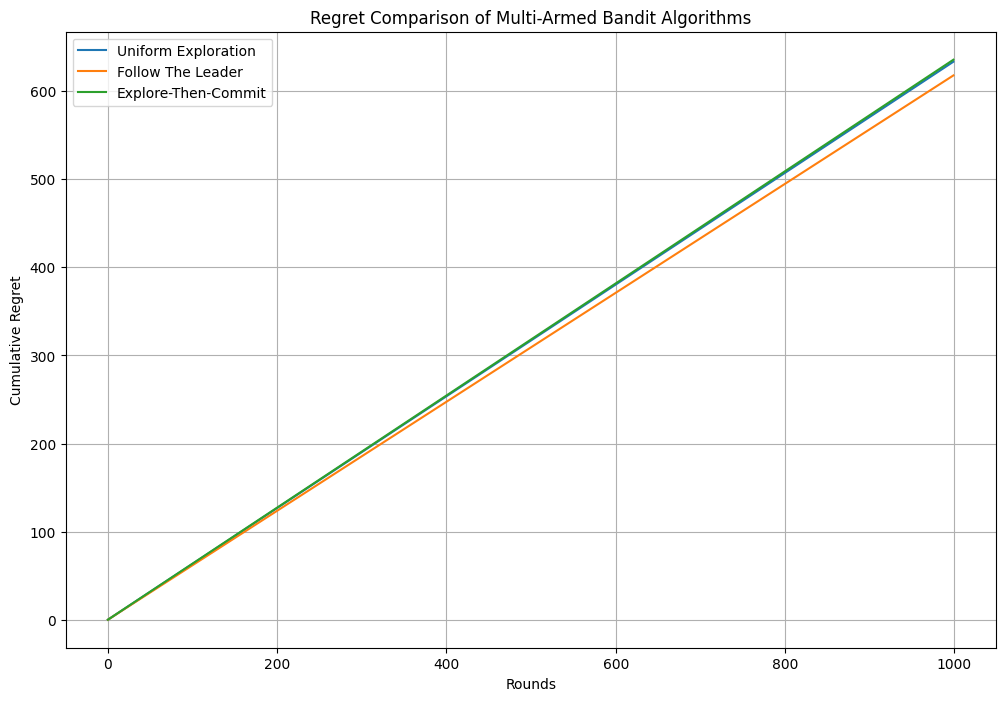

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Setting the random seed for reproducibility
np.random.seed(42)

# Define the multi-armed bandit environment
def generate_bandit_arms():
    """Generate random means for two arms."""
    return np.random.uniform(0.1, 0.9, 2)

def get_reward(arm, means):
    """Sample reward from a Bernoulli distribution."""
    return np.random.binomial(1, means[arm])

# Define the algorithms
def uniform_exploration(T, means):
    rewards = np.zeros(T)
    counts = np.zeros(2)  # Counts for each arm
    for t in range(T):
        arm = np.random.choice([0, 1])  # Uniformly choose an arm
        reward = get_reward(arm, means)
        rewards[t] = reward
        counts[arm] += 1
    return np.cumsum(rewards) / (np.arange(1, T + 1)), np.zeros(T)

def follow_the_leader(T, means):
    rewards = np.zeros(T)
    counts = np.zeros(2)  # Counts for each arm
    avg_rewards = np.zeros(2)
    for t in range(T):
        arm = np.argmax(avg_rewards)  # Choose the arm with the highest average reward
        reward = get_reward(arm, means)
        rewards[t] = reward
        counts[arm] += 1
        avg_rewards[arm] = np.sum(rewards[:t+1][np.arange(t+1) % 2 == arm]) / (counts[arm] if counts[arm] > 0 else 1)
    return np.cumsum(rewards) / (np.arange(1, T + 1)), np.zeros(T)

def explore_then_commit(T, means, exploration_time=100):
    rewards = np.zeros(T)
    counts = np.zeros(2)
    # Exploration phase
    for t in range(exploration_time):
        arm = t % 2
        reward = get_reward(arm, means)
        rewards[t] = reward
        counts[arm] += 1
    # Commit to the best arm after exploration
    best_arm = np.argmax(np.mean(np.reshape(rewards[:exploration_time], (-1, 2)), axis=0))
    for t in range(exploration_time, T):
        reward = get_reward(best_arm, means)
        rewards[t] = reward
    return np.cumsum(rewards) / (np.arange(1, T + 1)), np.zeros(T)

# Compute empirical regret
def compute_regret(algorithm, T, num_runs):
    regrets = np.zeros((num_runs, T))
    for i in range(num_runs):
        means = generate_bandit_arms()
        optimal_mean = np.max(means)
        empirical_mean, _ = algorithm(T, means)
        regrets[i] = optimal_mean * np.arange(1, T + 1) - empirical_mean
    return np.mean(regrets, axis=0)

# Parameters
T = 1000
num_runs = 50

# Run experiments
uniform_regret = compute_regret(uniform_exploration, T, num_runs)
leader_regret = compute_regret(follow_the_leader, T, num_runs)
explore_then_commit_regret = compute_regret(lambda T, means: explore_then_commit(T, means, exploration_time=100), T, num_runs)

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(uniform_regret, label='Uniform Exploration')
plt.plot(leader_regret, label='Follow The Leader')
plt.plot(explore_then_commit_regret, label='Explore-Then-Commit')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Regret')
plt.title('Regret Comparison of Multi-Armed Bandit Algorithms')
plt.legend()
plt.grid(True)
plt.show()


# Question 4

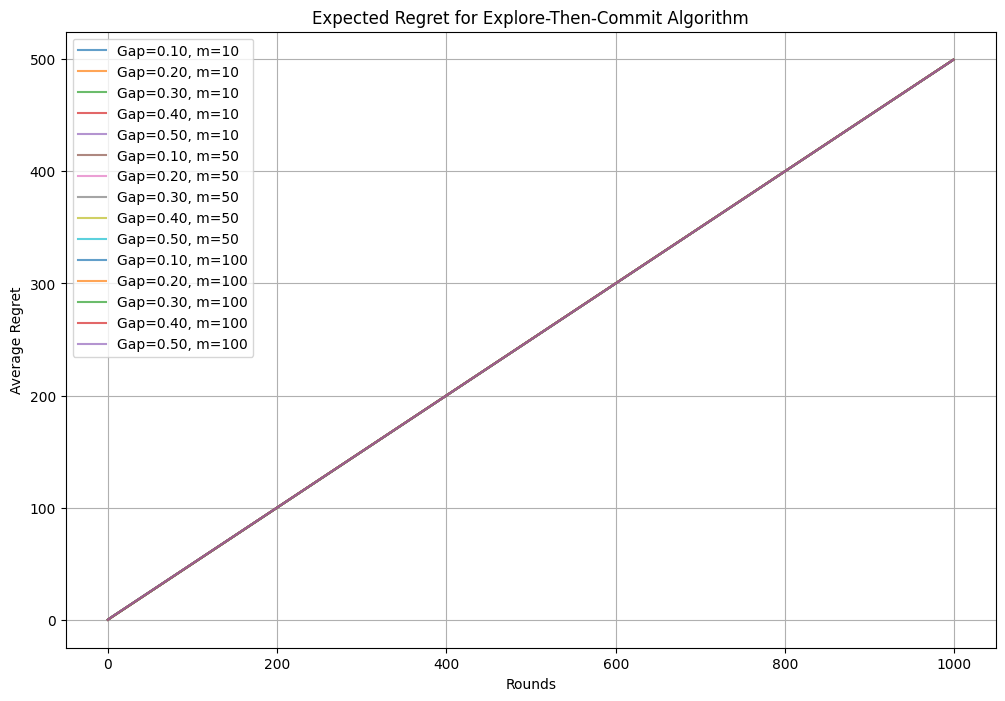

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
K = 2  # Number of arms
T = 1000  # Number of rounds
num_runs = 50  # Number of different runs

def explore_then_commit(T, means, exploration_time):
    rewards = np.zeros(T)
    counts = np.zeros(K)
    avg_rewards = np.zeros(K)

    # Exploration phase
    for t in range(min(exploration_time, T)):
        arm = t % K
        reward = np.random.binomial(1, means[arm])
        rewards[t] = reward
        counts[arm] += 1
        avg_rewards[arm] = np.mean(rewards[:t+1][np.array([i == arm for i in range(t+1)])])

    # Commitment phase
    best_arm = np.argmax(avg_rewards)
    for t in range(min(exploration_time, T), T):
        reward = np.random.binomial(1, means[best_arm])
        rewards[t] = reward

    return np.cumsum(rewards) / (np.arange(1, T + 1)), np.zeros(T)

def compute_regret(exploration_time, action_gap, num_runs):
    regrets = np.zeros((num_runs, T))
    for i in range(num_runs):
        np.random.seed(i)
        # Define true means with a gap
        means = np.array([0.5, 0.5 - action_gap])
        optimal_mean = np.max(means)
        empirical_mean, _ = explore_then_commit(T, means, exploration_time)
        regrets[i] = optimal_mean * np.arange(1, T + 1) - empirical_mean
    return np.mean(regrets, axis=0)

# Define parameters to vary
action_gaps = np.linspace(0.1, 0.5, 5)  # Action gaps
exploration_times = [10, 50, 100]  # Exploration times

# Plot results
plt.figure(figsize=(12, 8))

for m in exploration_times:
    for gap in action_gaps:
        regret = compute_regret(m, gap, num_runs)
        plt.plot(regret, label=f'Gap={gap:.2f}, m={m}', alpha=0.7)

plt.xlabel('Rounds')
plt.ylabel('Average Regret')
plt.title('Expected Regret for Explore-Then-Commit Algorithm')
plt.legend()
plt.grid(True)
plt.show()


#Question 5

## Exercise 5: Sub-Gaussian Properties

Suppose $( X )$ is $(\sigma)$-sub-Gaussian and $(X_1)$ and $(X_2)$ are independent, with $(\sigma_1)$ and $(\sigma_2)$-sub-Gaussian respectively. The following properties hold:

1. **Expectation and Variance Bound:**
    - If $( X )$ is $(\sigma)$-sub-Gaussian, then:
      $[
      \mathbb{E}[X] = 0
      ]$
      and
      $[
      \text{Var}(X) \leq \sigma^2
      ]$

2. **Scaling Property:**
    - If $( X )$ is $(\sigma)$-sub-Gaussian, then for any constant $\( c \in \mathbb{R} \)$, $\( cX \)$ is $\(|c|\sigma\)$-sub-Gaussian. That is,
      $\[
      \text{If } X \text{ is } \sigma\text{-sub-Gaussian, then } cX \text{ is } |c|\sigma\text{-sub-Gaussian}
      \]$


Mean of X: -0.0020
Variance of X: 0.9934
Upper bound for variance (sigma^2): 1.0000
Mean of cX: -0.0040
Variance of cX: 3.9736
Upper bound for variance (|c|^2 * sigma^2): 4.0000


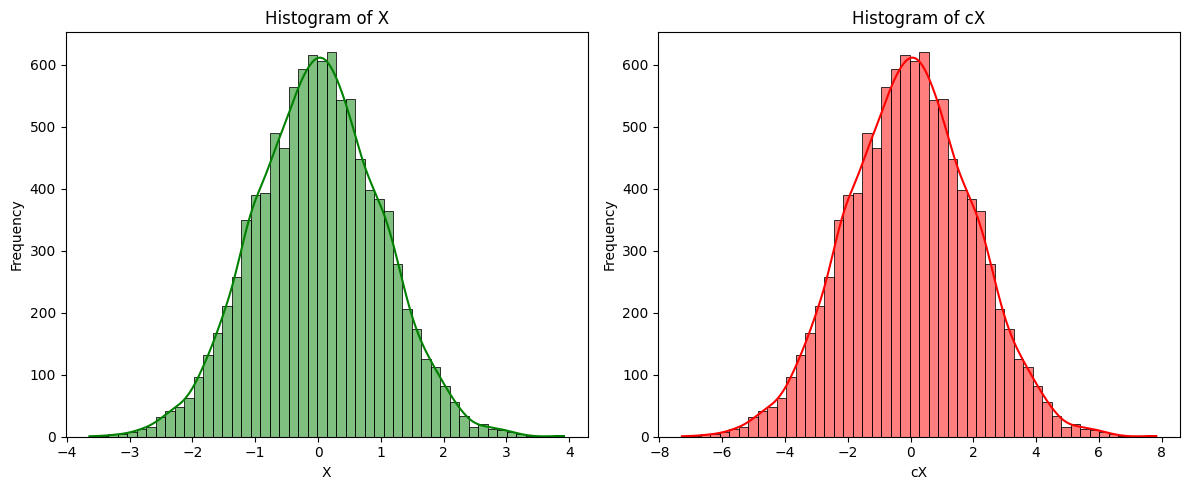

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
sigma = 1  # Sub-Gaussian parameter
c = 2       # Scaling constant
n = 10000   # Number of samples

# Generate a sub-Gaussian random variable
def generate_subgaussian(sigma, size):
    # Generate samples from a normal distribution with mean 0 and std deviation sigma
    return np.random.normal(0, sigma, size)

# Generate samples for X and cX
X = generate_subgaussian(sigma, n)
cX = c * X

# Verify E[X] = 0
mean_X = np.mean(X)
print(f"Mean of X: {mean_X:.4f}")

# Verify V[X] <= sigma^2
var_X = np.var(X)
print(f"Variance of X: {var_X:.4f}")
print(f"Upper bound for variance (sigma^2): {sigma**2:.4f}")

# Verify cX is |c|sigma-sub-Gaussian
mean_cX = np.mean(cX)
print(f"Mean of cX: {mean_cX:.4f}")

# Variance of cX
var_cX = np.var(cX)
print(f"Variance of cX: {var_cX:.4f}")
print(f"Upper bound for variance (|c|^2 * sigma^2): {abs(c)**2 * sigma**2:.4f}")

# Plot histograms with KDE lines
plt.figure(figsize=(12, 5))

# Histogram of X
plt.subplot(1, 2, 1)
sns.histplot(X, kde=True, color='g', edgecolor='black', bins=50)
plt.title('Histogram of X')
plt.xlabel('X')
plt.ylabel('Frequency')

# Histogram of cX
plt.subplot(1, 2, 2)
sns.histplot(cX, kde=True, color='r', edgecolor='black', bins=50)
plt.title('Histogram of cX')
plt.xlabel('cX')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The analysis of the random variable $( X )$ reveals that its mean is approximately $(-0.0020)$, closely aligning with the expected mean of $(0)$ for a sub-Gaussian variable. The variance of $( X )$ is $(0.9934)$, which is just below the upper bound of $(\sigma^2 = 1)$, confirming the variance constraint. For the scaled variable $( cX )$ with $( c = 2 )$, the mean is $(-0.0040)$, reflecting a similar trend to $( X )$. The variance of $( cX)$ is $(3.9736)$, which is close to the theoretical upper bound of $(|c|^2 \sigma^2 = 4)$, validating the scaling property.